In [1]:
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
import copy

centers = [(180, 280)]
places = {'B': {'color':[255, 0, 0], 'pos': (1021, 900) }}

colors = [[[{} for k in range(256)] for i in range(256)] for j in range(256)]

colors[255][192][203] = {'allowed': False, 'speed_coeff': 0}
colors[173][216][230] = {'allowed': True, 'speed_coeff': 4}
colors[144][238][144] = {'allowed': True, 'speed_coeff': 2}
colors[0][0][255] = {'allowed': True, 'speed_coeff': 1} # blue
colors[255][0][0] = {'allowed': True, 'speed_coeff': 1} # red
colors[190][190][190] = {'allowed': False, 'speed_coeff': 0}
colors[255][255][255] = {'allowed': True, 'speed_coeff': 1}


lookup_color = [233, 220, 180, 255]

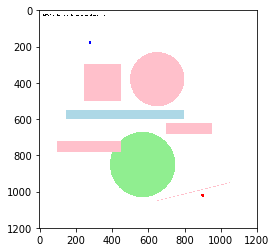

In [2]:
img = Image.open('pixel_world.png')
data = np.array(img)
lookup = copy.deepcopy(data)
path = copy.deepcopy(data)
result_pic = copy.deepcopy(data)
#converted = np.where(data == 0, 0, 255)
#print(converted)

img = Image.fromarray(lookup.astype('uint8'))
#img.save('new_pic.jpg')
imshow(np.asarray(img))

In [3]:
from queue import Queue
from queue import PriorityQueue
from math import sqrt
direction = [ (-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1)]

def find_path(center, id):
    color = places[id]['color']
    dest = places[id]['pos']
    found = None
    q = PriorityQueue()
    cost = {}
    came_from = {}
    def h(u, v):
        return sqrt((u[0]-v[0])**2 + (u[1]-v[1])**2)
        #return max(abs(u[0]-v[0]), abs(u[1]-v[1]))
        #return abs(u[0]-v[0]) + abs(u[1]-v[1])
    q.put((0, center))
    cost[center] = 0
    print((0, center))
    best = None
    while not q.empty():
        u = q.get()[1]
        #print(u, h(u, dest))
        if np.array_equal(data[u[0]][u[1]][:-1], color):
            found = u
            break
        cc = data[u[0]][u[1]]
        lookup[u[0]][u[1]] = [int((cc[i] + lookup_color[i])/2.0) for i in range(len(cc))]
        result_pic[u[0]][u[1]] = lookup[u[0]][u[1]]
        #img = Image.fromarray(data.astype('uint8'))
        #img.save("nax.png")
        for dir in direction:
            i, j = u[0] + dir[0], u[1] + dir[1]
            #print("adding:", (i, j), " with distance:", h((i, j), dest))
            next_color = data[i][j]
            r, g, b = next_color[:-1]
            #print(r, g, b)
            if not colors[r][g][b]['allowed']:
                continue
            new_cost = cost[u] + 1*colors[r][g][b]['speed_coeff']
            if (i, j) not in cost or new_cost < cost[(i, j)]:
                cost[(i, j)] = new_cost
                priority = new_cost + h((i,j), dest)
                q.put((priority, (i,j)))
                came_from[(i, j)] = u
    print("Found:", found)
    path = [found]
    current = found
    while not current == center: 
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path

In [4]:
path = find_path(centers[0], 'B')

(0, (180, 280))
Found: (1021, 907)


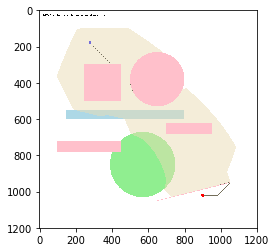

In [5]:
for vertex in path:
    result_pic[vertex[0]][vertex[1]] = [int(([0, 0, 0, 255][i] + lookup_color[i])/2.0) for i in range(4)]
img = Image.fromarray(result_pic.astype('uint8'))
img.save("nax.png")
imshow(np.asarray(img))